In [4]:
from sklearn.metrics.pairwise import rbf_kernel
import os
os.chdir('..')
os.getcwd()

'd:\\download\\python_lianxi\\HW\\rl_project\\Personalized_News_Recommendation'

In [5]:
%%time
import dataset
files = (f"../../../data/R6/ydata-fp-td-clicks-v1_0.20090501")
dataset.get_yahoo_events(files)

4681992 events with 50 articles
CPU times: total: 13.8 s
Wall time: 1min 40s


In [37]:
def plot_results(tests):
    
    learn_ctrs = []
    deploy_ctrs = []

    for test in tests:
        learn, deploy = evaluate(test,size=10)
        learn = learn[1000:]
        if hasattr(test, 'e'):
            plt.plot(learn, label="ε={}".format(test.e),linewidth=0.5)
        else:
            plt.plot(learn, label="α={}".format(test.alpha),linewidth=0.5)
        
        learn_ctrs.append(learn[-1]/rnd_ctr)   
        deploy_ctrs.append(deploy[-1]/rnd_ctr) 

    plt.title("Learning bucket")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    
    if hasattr(test, 'e'):
        param_values = [x.e for x in tests]
        plt.xlabel("ε")
    else:
        param_values = [x.alpha for x in tests]
        plt.xlabel("α")
    plt.plot(param_values, learn_ctrs,marker='o')
    plt.title('Learning bucket')
    plt.ylabel("CTR lift")
    plt.show()


    if hasattr(test, 'e'):
        plt.xlabel("ε")
    else:
        plt.xlabel("α")
    plt.ylabel("CTR lift")
    plt.plot(param_values, deploy_ctrs,marker='o')
    plt.title('Deployment bucket')
    plt.show()

    best_idx = np.argmax(deploy_ctrs)
    print('Best parameter:',tests[best_idx].algorithm)

In [8]:
_, deploy_ctr = evaluate(Egreedy(1))
rnd_ctr = deploy_ctr[-1]

Egreedy (epsilon=1) 0.041     13.1s


In [7]:
%load_ext autoreload
%autoreload 2


from evaluator import evaluate
from bandits import *
from matplotlib import pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processed 0 events
Processed 100000 events
Processed 200000 events
Processed 300000 events
Processed 400000 events
KernelUCB(alpha=0.1,context:user)0.0529    9.9m
Processed 0 events
Processed 100000 events
Processed 200000 events
Processed 300000 events
Processed 400000 events
KernelUCB(alpha=0.3,context:user)0.0489    11.7m
Processed 0 events
Processed 100000 events
Processed 200000 events
Processed 300000 events
Processed 400000 events
KernelUCB(alpha=0.5,context:user)0.0587    14.3m
Processed 0 events
Processed 100000 events
Processed 200000 events
Processed 300000 events
Processed 400000 events
KernelUCB(alpha=0.7,context:user)0.0483    12.2m
Processed 0 events
Processed 100000 events
Processed 200000 events
Processed 300000 events
Processed 400000 events
KernelUCB(alpha=0.9,context:user)0.0544    12.4m
Processed 0 events
Processed 100000 events
Processed 200000 events
Processed 300000 events
Processed 400000 events
KernelUCB(alpha=1.1,context:user)0.0714    16.5m
Processed 0 event

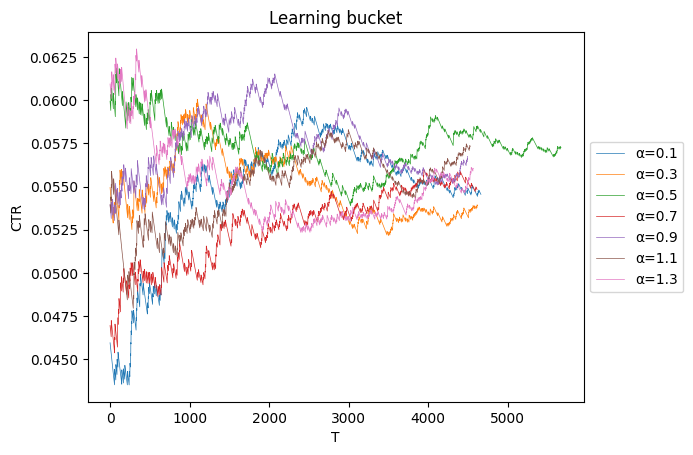

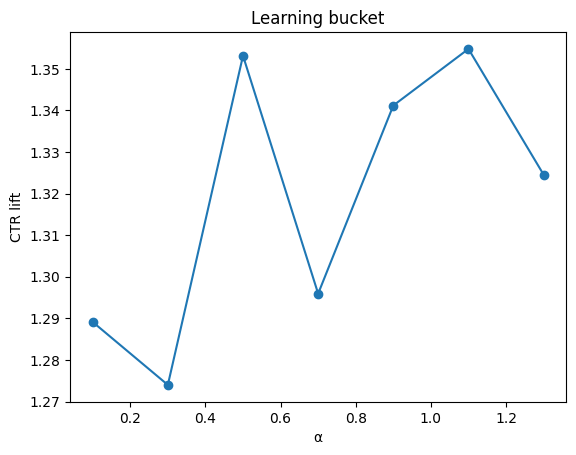

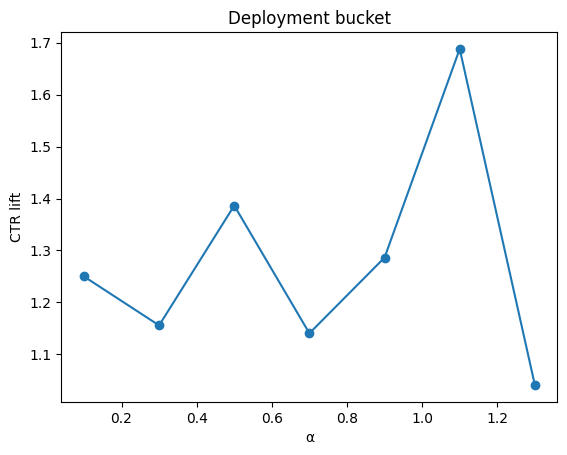

Best parameter: KernelUCB(alpha=1.1,context:user)
CPU times: total: 4h 10min 23s
Wall time: 1h 26min 43s


In [40]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [KernelUCB(a, context="user") for a in alpha_values]
plot_results(tests)